In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
# Load the datasets
alcohol_sales_df = pd.read_csv('Alcohol_Sales.csv')
miles_traveled_df = pd.read_csv('Miles_Traveled.csv')

In [5]:
print(alcohol_sales_df.head())

         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221


In [6]:
print(miles_traveled_df.head())

         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [7]:
# Rename the columns for clarity
alcohol_sales_df.columns = ['DATE', 'Alcohol_Sales']
miles_traveled_df.columns = ['DATE', 'Miles_Traveled']

In [8]:
# Convert the DATE columns to datetime objects
alcohol_sales_df['DATE'] = pd.to_datetime(alcohol_sales_df['DATE'])
miles_traveled_df['DATE'] = pd.to_datetime(miles_traveled_df['DATE'])

In [9]:
# Prepare the data for Prophet
alcohol_sales_df = alcohol_sales_df.rename(columns={'DATE': 'ds', 'Alcohol_Sales': 'y'})
miles_traveled_df = miles_traveled_df.rename(columns={'DATE': 'ds', 'Miles_Traveled': 'y'})

In [10]:
# Initialize Prophet models
alcohol_sales_model = Prophet()
miles_traveled_model = Prophet()

In [11]:
# Fit the models
alcohol_sales_model.fit(alcohol_sales_df)
miles_traveled_model.fit(miles_traveled_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6549g66q/0d7e0o_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6549g66q/h8jc2ii1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41457', 'data', 'file=/tmp/tmp6549g66q/0d7e0o_a.json', 'init=/tmp/tmp6549g66q/h8jc2ii1.json', 'output', 'file=/tmp/tmp6549g66q/prophet_model_hb0gnol/prophet_model-20240624191949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

In [12]:
# Create a dataframe for future predictions (next 12 months)
future_alcohol_sales = alcohol_sales_model.make_future_dataframe(periods=12, freq='M')
future_miles_traveled = miles_traveled_model.make_future_dataframe(periods=12, freq='M')

In [13]:
# Make predictions
forecast_alcohol_sales = alcohol_sales_model.predict(future_alcohol_sales)
forecast_miles_traveled = miles_traveled_model.predict(future_miles_traveled)

In [14]:
# Calculate evaluation metrics
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

In [16]:
# Evaluate the models (using the last 12 months of historical data as a simple example)
last_12_months = alcohol_sales_df.tail(12)
alcohol_sales_mae, alcohol_sales_rmse = evaluate_forecast(last_12_months['y'], forecast_alcohol_sales['yhat'][-12:])

last_12_months = miles_traveled_df.tail(12)
miles_traveled_mae, miles_traveled_rmse = evaluate_forecast(last_12_months['y'], forecast_miles_traveled['yhat'][-12:])


In [17]:
# Print evaluation metrics
print("Alcohol Sales - MAE:", alcohol_sales_mae, "RMSE:", alcohol_sales_rmse)
print("Miles Traveled - MAE:", miles_traveled_mae, "RMSE:", miles_traveled_rmse)

Alcohol Sales - MAE: 701.9597631539174 RMSE: 808.4652453500079
Miles Traveled - MAE: 5412.420987587252 RMSE: 6725.3814082468


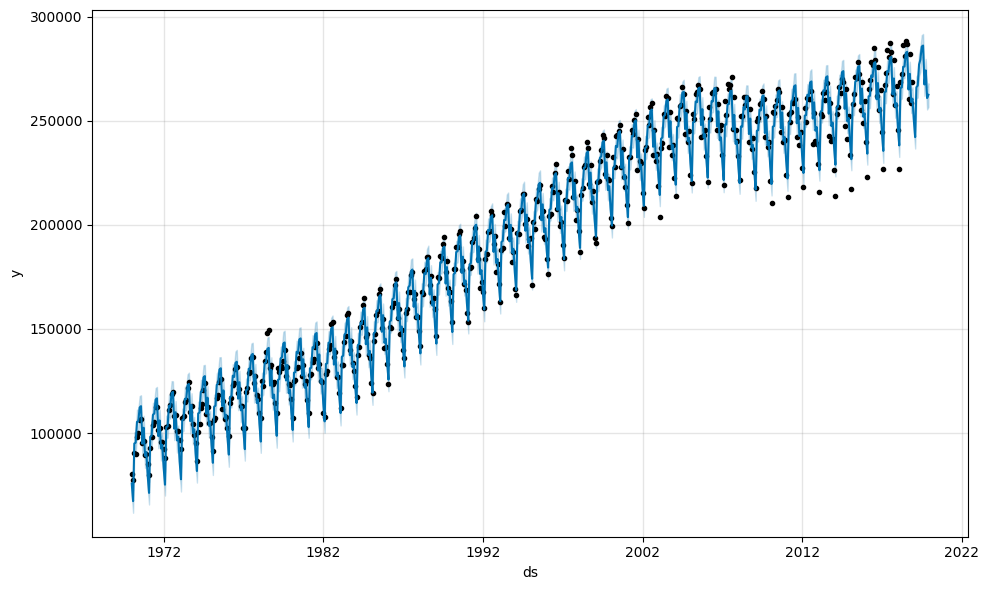

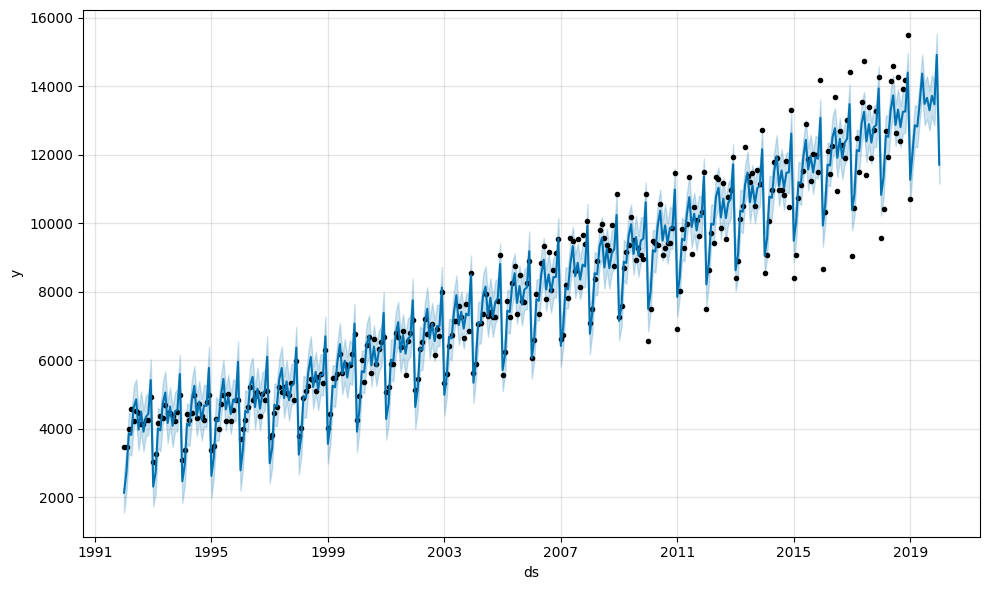

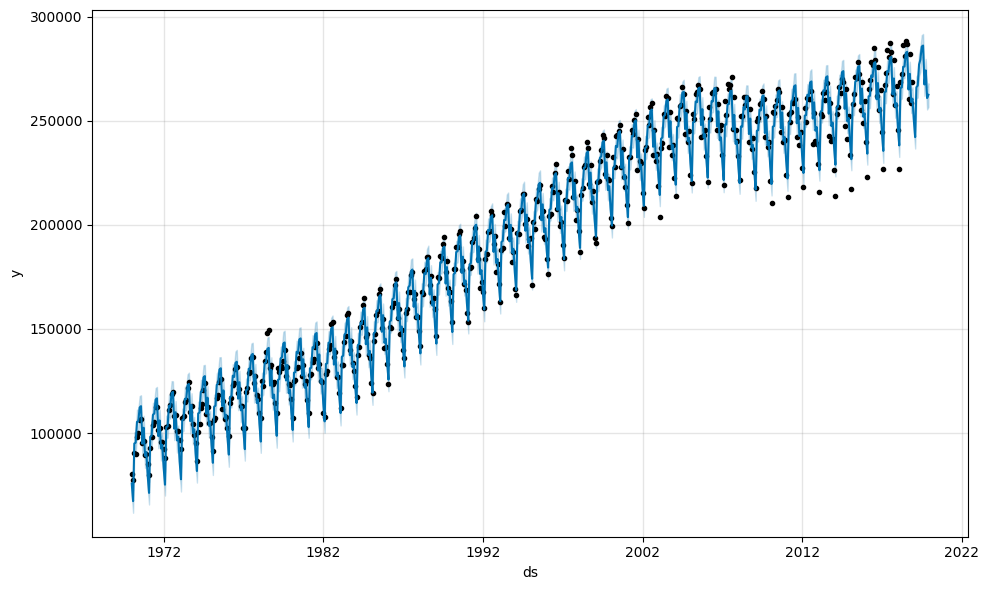

In [18]:
# Plot the forecasts
alcohol_sales_model.plot(forecast_alcohol_sales)
miles_traveled_model.plot(forecast_miles_traveled)